In [1]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd 
import numpy as np

In [2]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: this controls the font used in figures
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)

from res_ind_lib import *     #MAIN library: the functions used to compute risk, resilience, etc

## Get the Data

In [3]:
df = pd.read_csv("results/all_data_and_results.csv", index_col=0, skiprows=[0,2])
df.head()

,pop,cp,cr,pov_head,gdp_pc_pp,shewp,shewr,social_p,social_r,gdp_pc_pp_nat,...,dK,delta_W,dcap,dcar,dKtot,dWpc_curency,dWtot_currency,risk,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Abra,51167,92.828972,203.891421,0.271936,173.689487,0.063163,0.173531,0.173531,0.203457,234.602577,...,0.614174,0.000019,58.743861,113.406393,2973.078799,0.109730,5614.561571,0.000632,0.529530,0.000335
Agusan del Norte,141357,82.348426,234.816324,0.276778,192.616487,0.249100,0.147336,0.147336,0.226521,234.602577,...,4.450667,0.000133,63.714329,143.515689,66857.906674,0.871012,123123.615602,0.004522,0.543014,0.002456
Agusan del Sur,141595,83.304081,216.087522,0.372958,166.564929,0.139189,0.126444,0.126444,0.113334,234.602577,...,4.185219,0.000159,69.722530,159.377601,68827.651156,1.140791,161530.238947,0.006849,0.426098,0.002918
Aklan,123269,79.445859,211.619510,0.204461,184.595206,0.128517,0.184183,0.184183,0.239542,234.602577,...,20.030933,0.000612,75.992018,165.078167,2469193.051555,37.882087,4669686.938954,0.205217,0.528771,0.108513
Albay,267030,76.582210,224.008585,0.339106,174.015387,0.172775,0.201804,0.201804,0.213554,234.602577,...,1.282702,0.000047,61.240437,143.946460,342519.944089,2.898739,774050.339427,0.016658,0.442503,0.007371


## Map the data

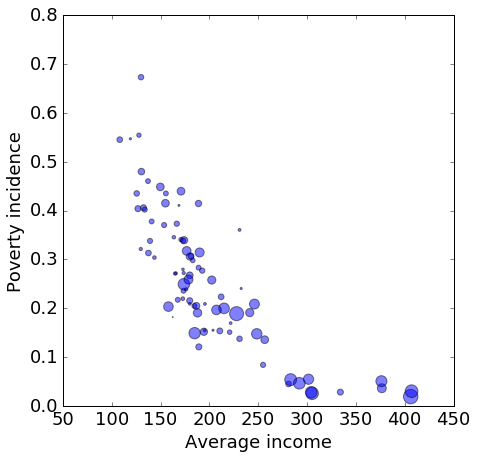

In [4]:
df.plot.scatter(x="gdp_pc_pp", y="pov_head", s=df["pop"]/5e3, alpha=0.5, figsize=(7,7))
plt.xlabel("Average income")
plt.ylabel("Poverty incidence")
plt.ylim(0);

plt.savefig("img/poverty_vs_income.png")

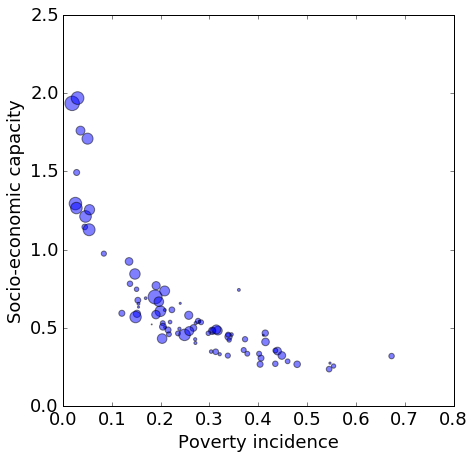

In [9]:
df.plot.scatter(x="pov_head", y="resilience", s=df["pop"]/5e3, alpha=0.5, figsize=(7,7))
plt.xlabel("Poverty incidence")
plt.ylabel("Socio-economic capacity")
plt.ylim(0);
plt.xlim(0);
plt.savefig("img/capacity_vs_poverty.png")

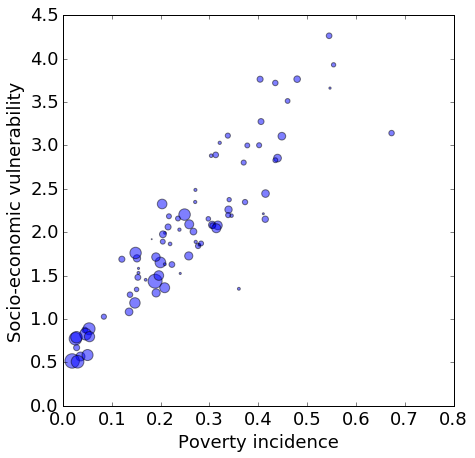

In [11]:
df.assign(vu=1/df.resilience).plot.scatter(x="pov_head", y="vu", s=df["pop"]/5e3, alpha=0.5, figsize=(7,7))
plt.xlabel("Poverty incidence")
plt.ylabel("Socio-economic vulnerability")
plt.ylim(0);
plt.xlim(0);
plt.savefig("img/se_vuln_vs_poverty.png")